c:\Users\jared\anaconda3\envs\CSE450\lib\site-packages\neptune\common\warnings.py:62: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  warnings.warn(


https://app.neptune.ai/jaredlin70/CSE450-Project2/e/CSEP-2


<ipython-input-1-14d27a133d93>:75: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
<ipython-input-1-14d27a133d93>:75: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
<ipython-input-1-14d27a133

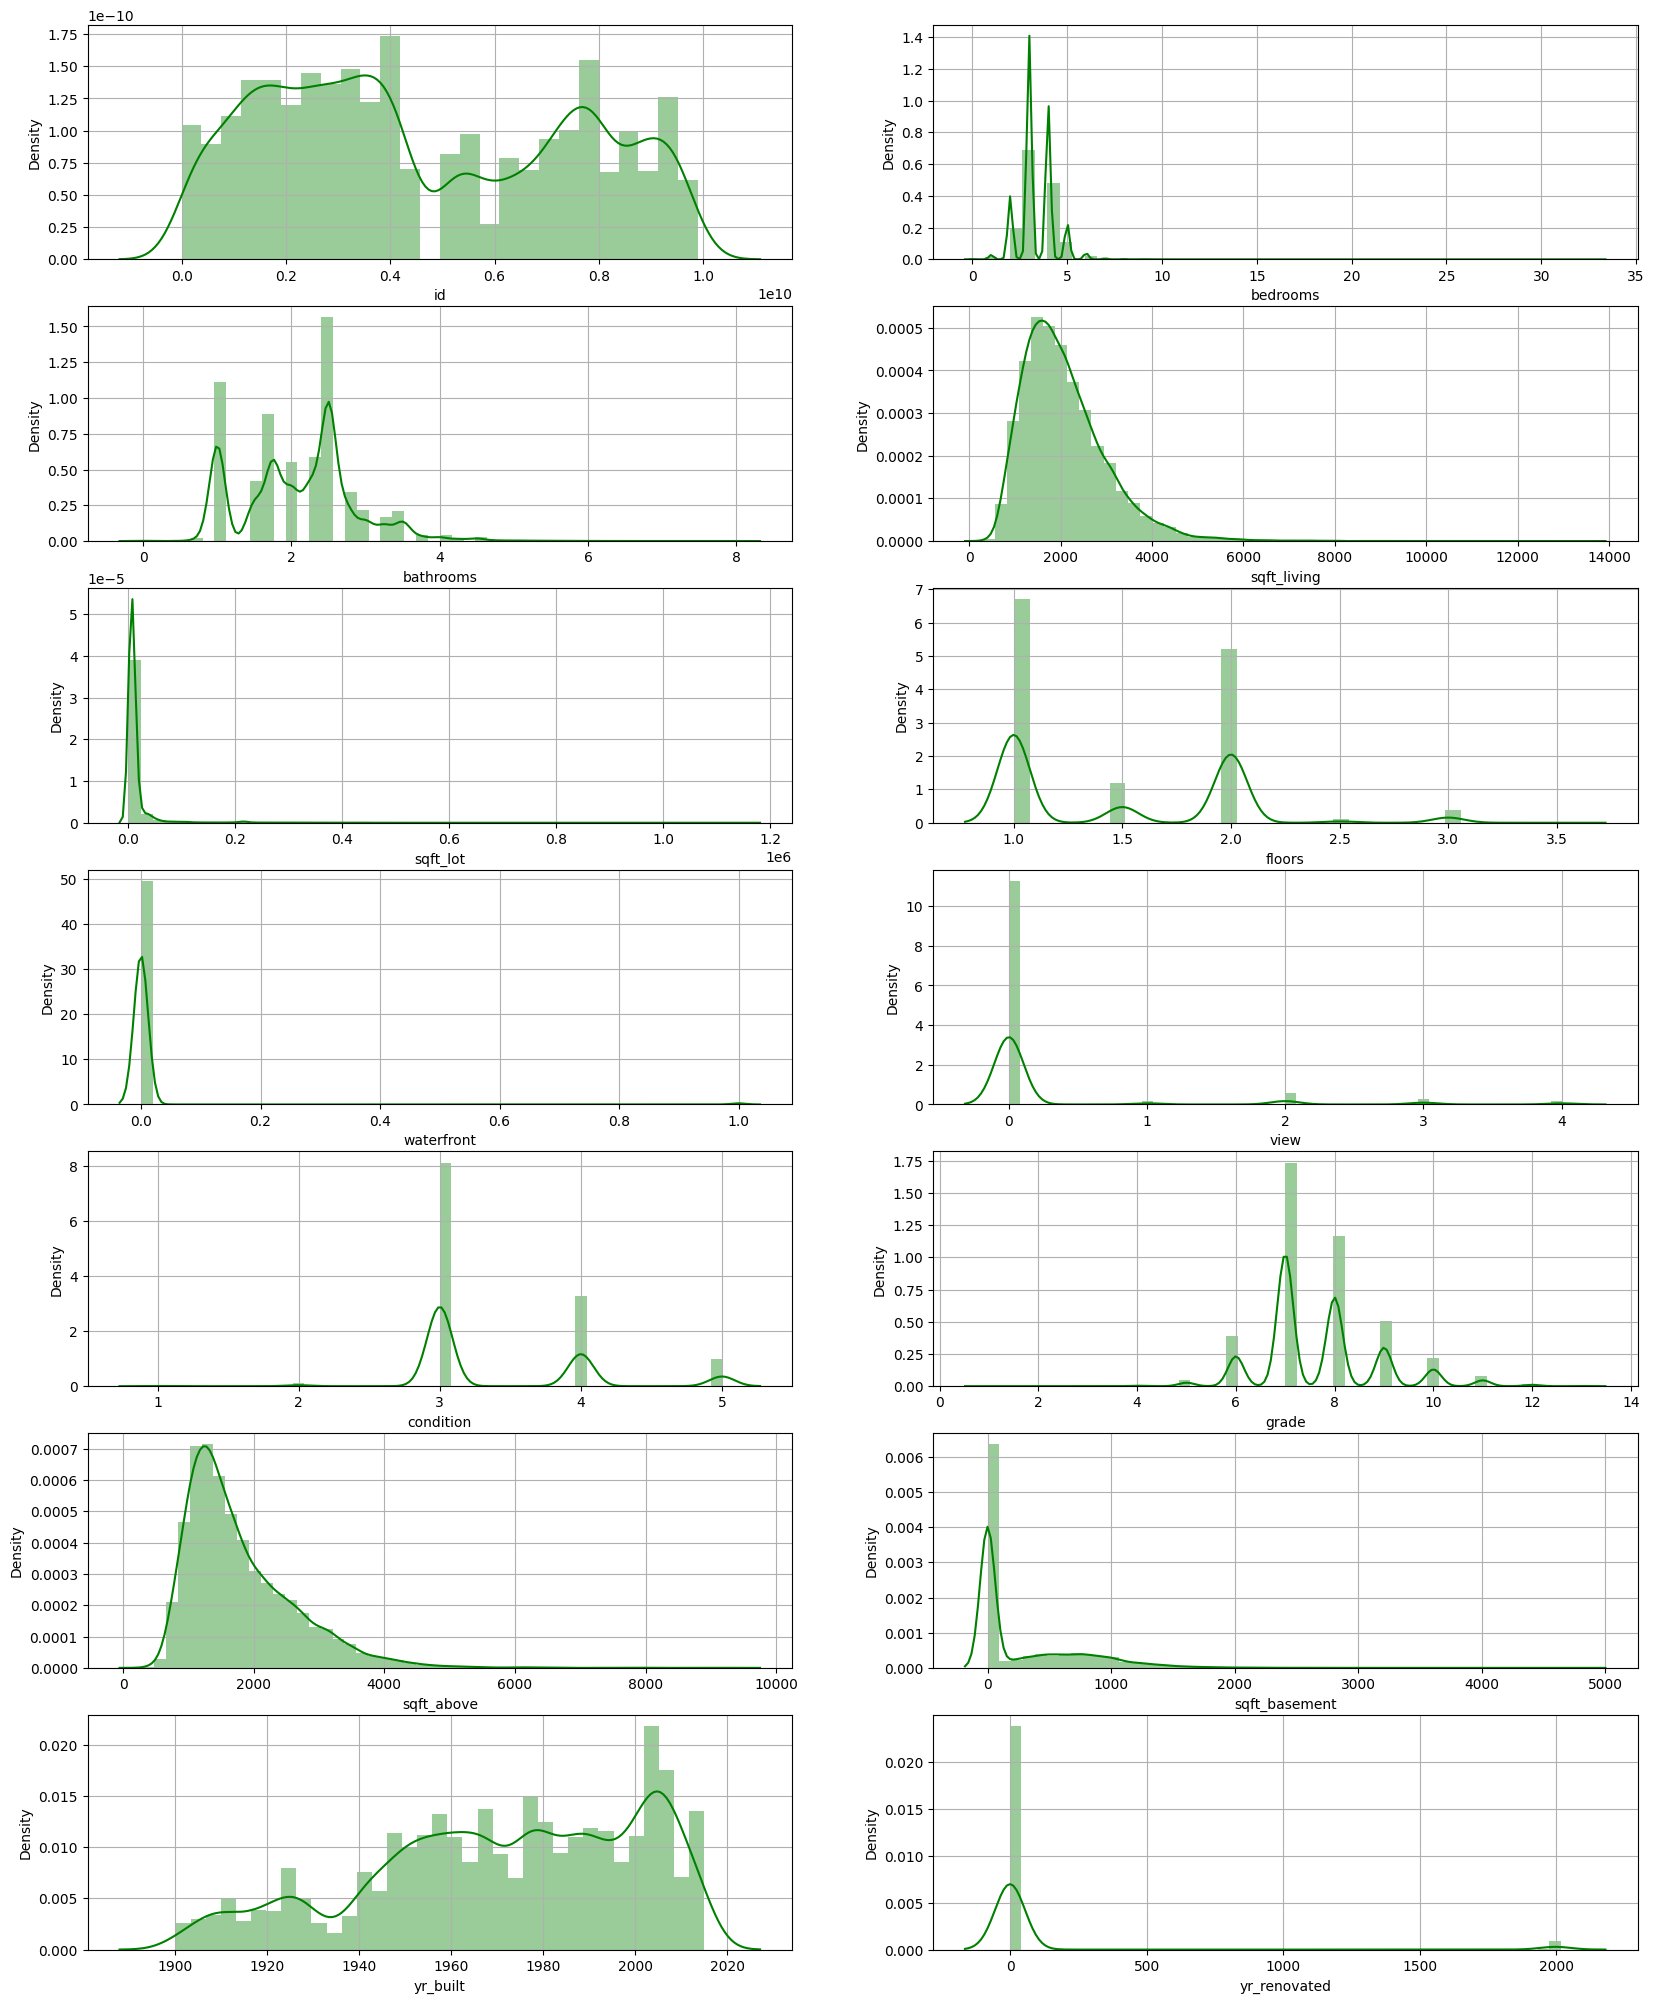

Run CSEP-2 received abort signal. Exiting
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
All 1 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/jaredlin70/CSE450-Project2/e/CSEP-2/metadata


: 

In [1]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']


#%%

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']


#%%

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

: 

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']


#%%

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

: 

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']


#%%

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

: 

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']


#%%

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

: 

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']


#%%

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

: 

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']


#%%

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

: 

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']


#%%

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

: 

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']


#%%

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

: 

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']


#%%

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

: 

In [ ]:
fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

: 

In [ ]:
# split data into training, validation, and testing sets
X_set, X_test, y_set, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_set, y_set, test_size=0.2)

# create the xgboost matrices
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

evals = [(dtrain, "train"), (dval, "valid")]
npt_callback = NeptuneCallback(run=run)

# create the parameter grid
params_grid = {
    "n_estimators": 1000,
    "max_depth": 6,
    "learning_rate": 0.1,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "objective": "reg:squarederror",
    "seed": 42,
}

# train the model
model = xgb.train(
    params=params_grid,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=10,
    callbacks=[npt_callback],
)

# create the xgboost matrix for the test data
dtest = xgb.DMatrix(X_test, label=y_test)

# make predictions on the test data
y_pred = model.predict(dtest)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error
rmse = sqrt(mse)

# calculate the r2 score
r2 = r2_score(y_test, y_pred)

# log the metrics to neptune
run["mae"].log(mae)
run["mse"].log(mse)
run["rmse"].log(rmse)
run["r2"].log(r2)

# log the model to neptune
run["model"].upload(File.as_pickle(model))

# log the feature importances to neptune
fig, ax = plt.subplots(figsize=(12, 18))
plot_importance(model, ax=ax)
run["feature_importances"].log(neptune.types.File.as_image(fig))

# log the feature correlations to neptune
corr = X.corr()
fig, ax = plt.subplots(figsize=(12, 18))
sns.heatmap(corr, annot=True, ax=ax)
run["feature_correlations"].log(neptune.types.File.as_image(fig))

# log the feature correlations to neptune
fig, ax = plt.subplots(figsize=(12, 18))
plot_tree(model, ax=ax)
run["tree"].log(neptune.types.File.as_image(fig))

# log the feature correlations to neptune
fig, ax = plt.subplots(figsize=(12, 18))
to_graphviz(model, ax=ax)
run["graphviz"].log(neptune.types.File.as_image(fig))

# end the neptune run
run.stop()

: 

In [ ]:
fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']

In [ ]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']

In [1]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree, plot_importance, to_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import neptune
from neptune.integrations.xgboost import NeptuneCallback
from matplotlib import pyplot as plt
import seaborn as sns

# ask the user for the api key
api_key = input("Please enter your Neptune API key: ")

# neptune ai implementation
run = neptune.init_run(
    project="jaredlin70/CSE450-Project2",
    api_token=api_key,
)

# load in data for housing from Seattle
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# add built_after_1976 column to dataframe - hot encode it
housing['built_after_1976'] = (housing['yr_built'] > 1976).astype(int)

# calculate distance from each location
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).miles

locations = {
    "Amazon_HQ": (47.62246, -122.336775),
    "Microsoft": (47.64429, -122.12518),
    "Starbucks": (47.580463, -122.335897),
    "Boeing_Plant": (47.543969, -122.316443)
}

# add distance columns to dataframe
for name, coords in locations.items():
    housing[name + '_distance'] = housing.apply(lambda row: calculate_distance(row['lat'], row['long'], coords[0], coords[1]), axis=1)

# add sqft_product, year, month, and day columns to dataframe
housing['sqft_product'] = housing['sqft_living'] * housing['sqft_lot']
housing['year'] = pd.to_datetime(housing['date']).dt.year
housing['month'] = pd.to_datetime(housing['date']).dt.month
housing['day'] = pd.to_datetime(housing['date']).dt.day

# drop date column
housing = housing.drop('date', axis=1)

# Bin sqft_product into different categories
housing['sqft_product_bins'] = pd.qcut(housing['sqft_product'], q=3, labels=['small_properties', 'medium_properties', 'large_properties'])

# hot encode sqft_product_bins
housing = pd.get_dummies(housing, columns=['sqft_product_bins'])

# create X and y - drop price from X
X = housing.drop('price', axis=1)
y = housing['price']

c:\Users\jared\anaconda3\envs\CSE450\lib\site-packages\neptune\common\warnings.py:62: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  warnings.warn(


https://app.neptune.ai/jaredlin70/CSE450-Project2/e/CSEP-3


<ipython-input-2-fd83d80791fa>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
<ipython-input-2-fd83d80791fa>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
<ipython-input-2-fd83d80791f

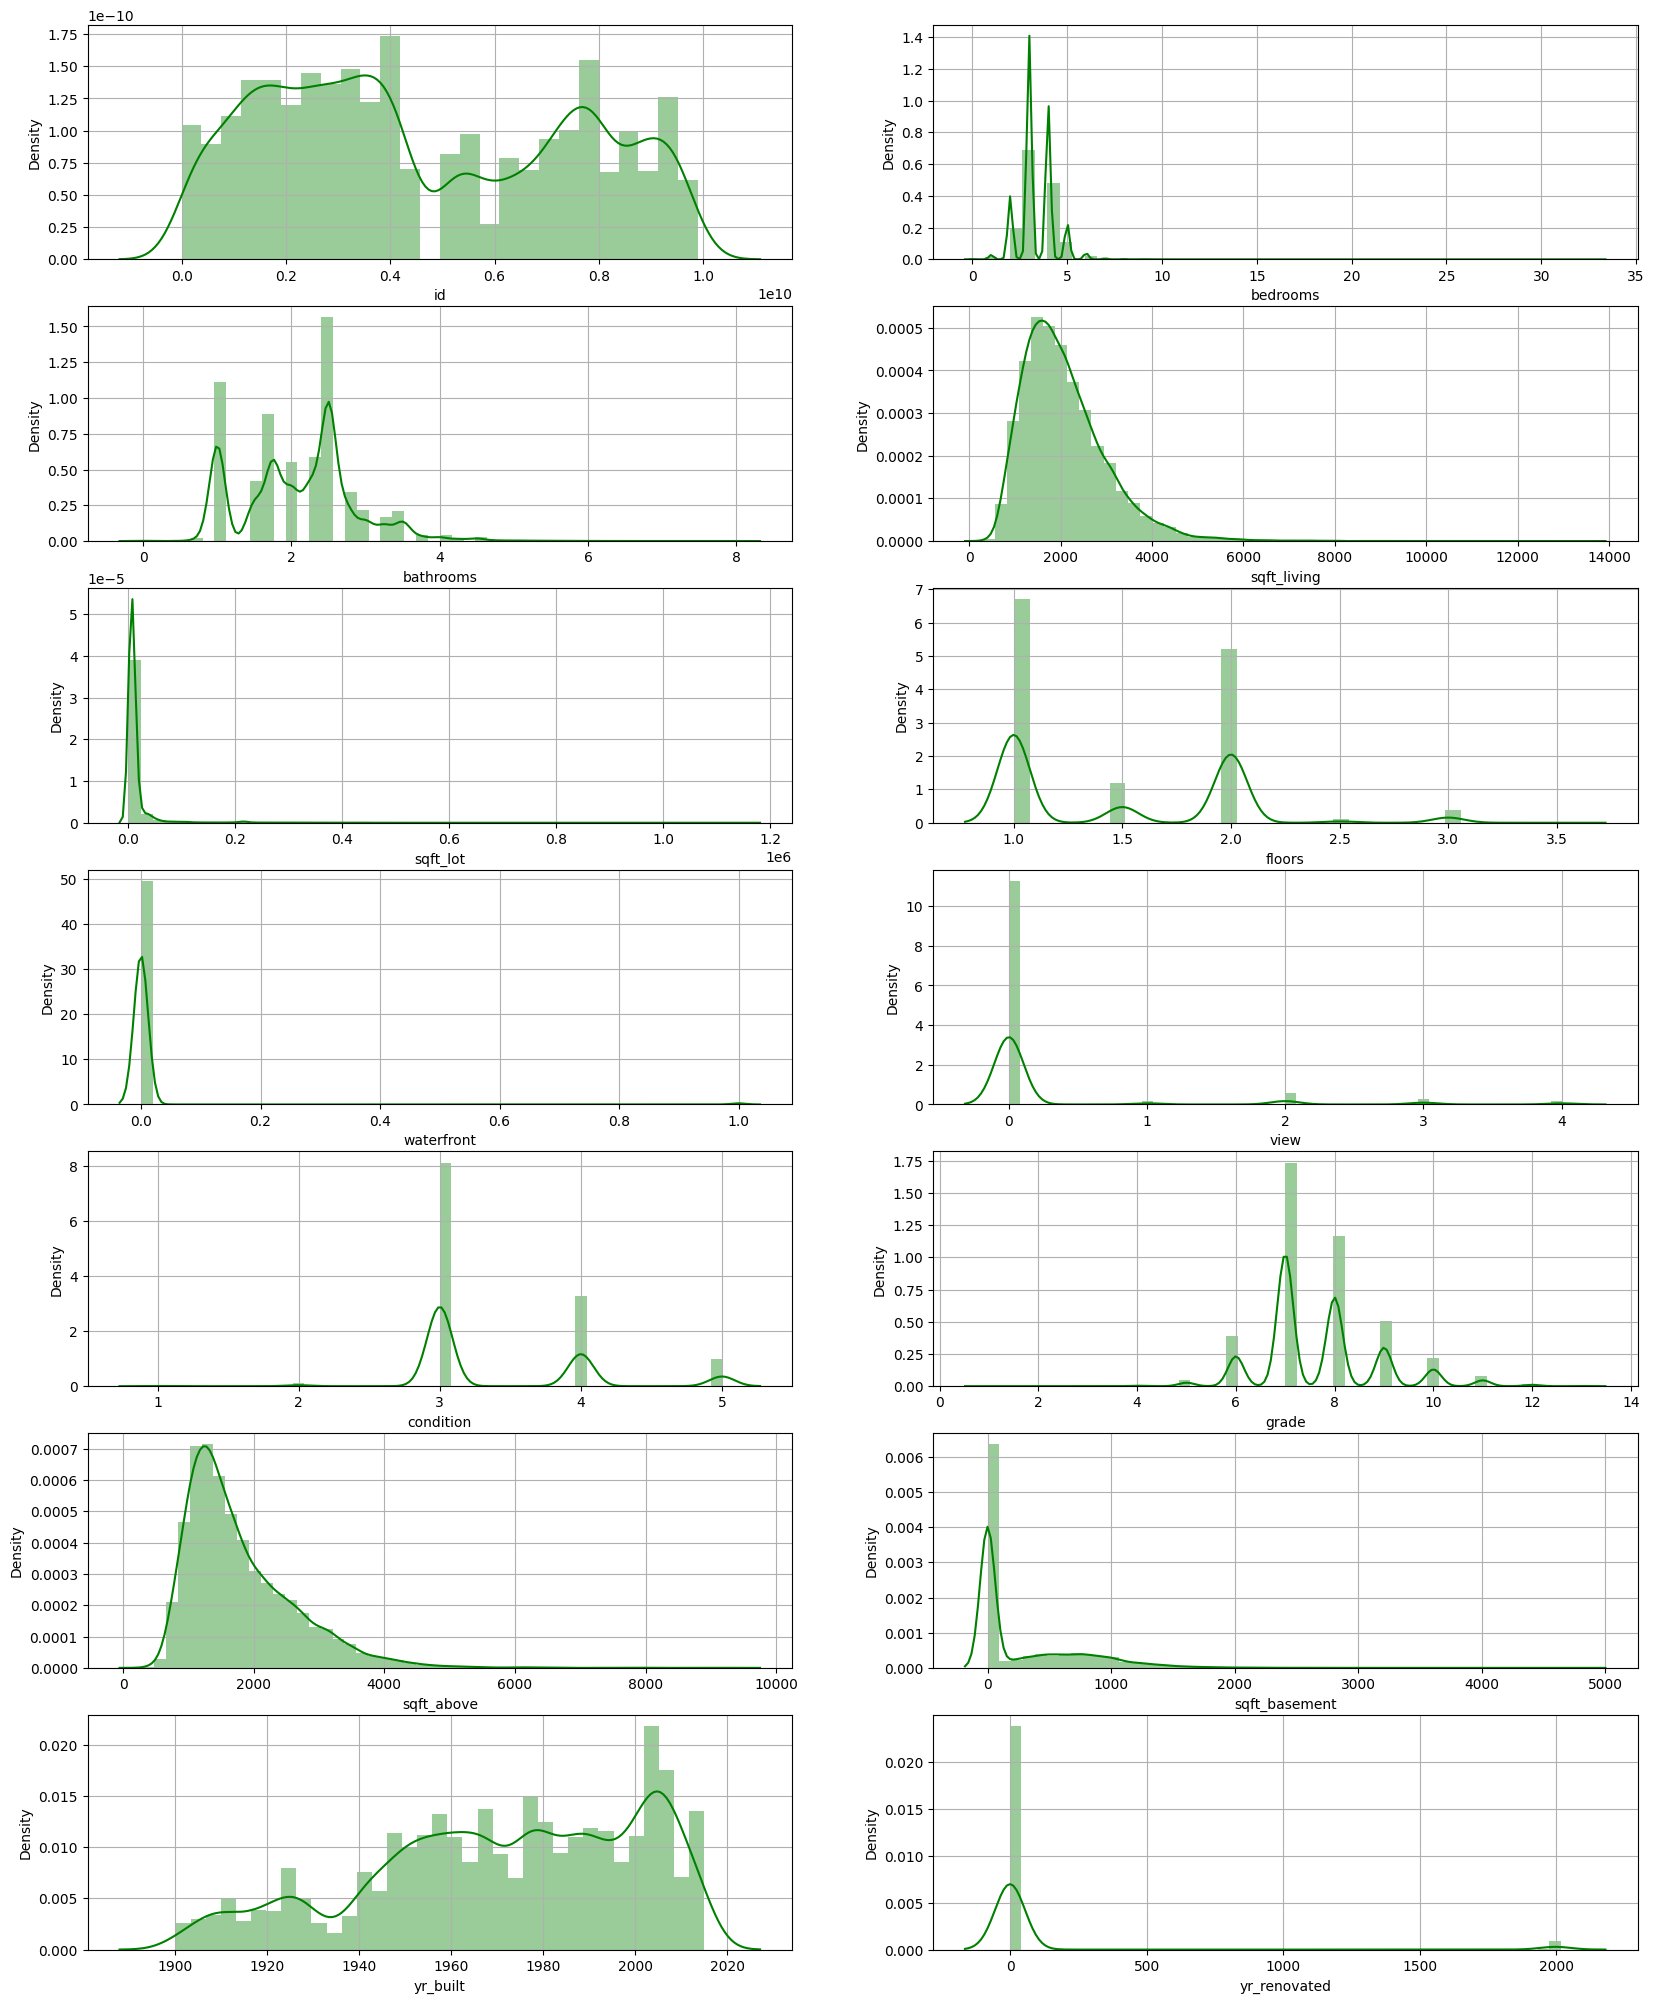

In [2]:
fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

<ipython-input-3-e90c3fa9aac3>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
<ipython-input-3-e90c3fa9aac3>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
<ipython-input-3-e90c3fa9a

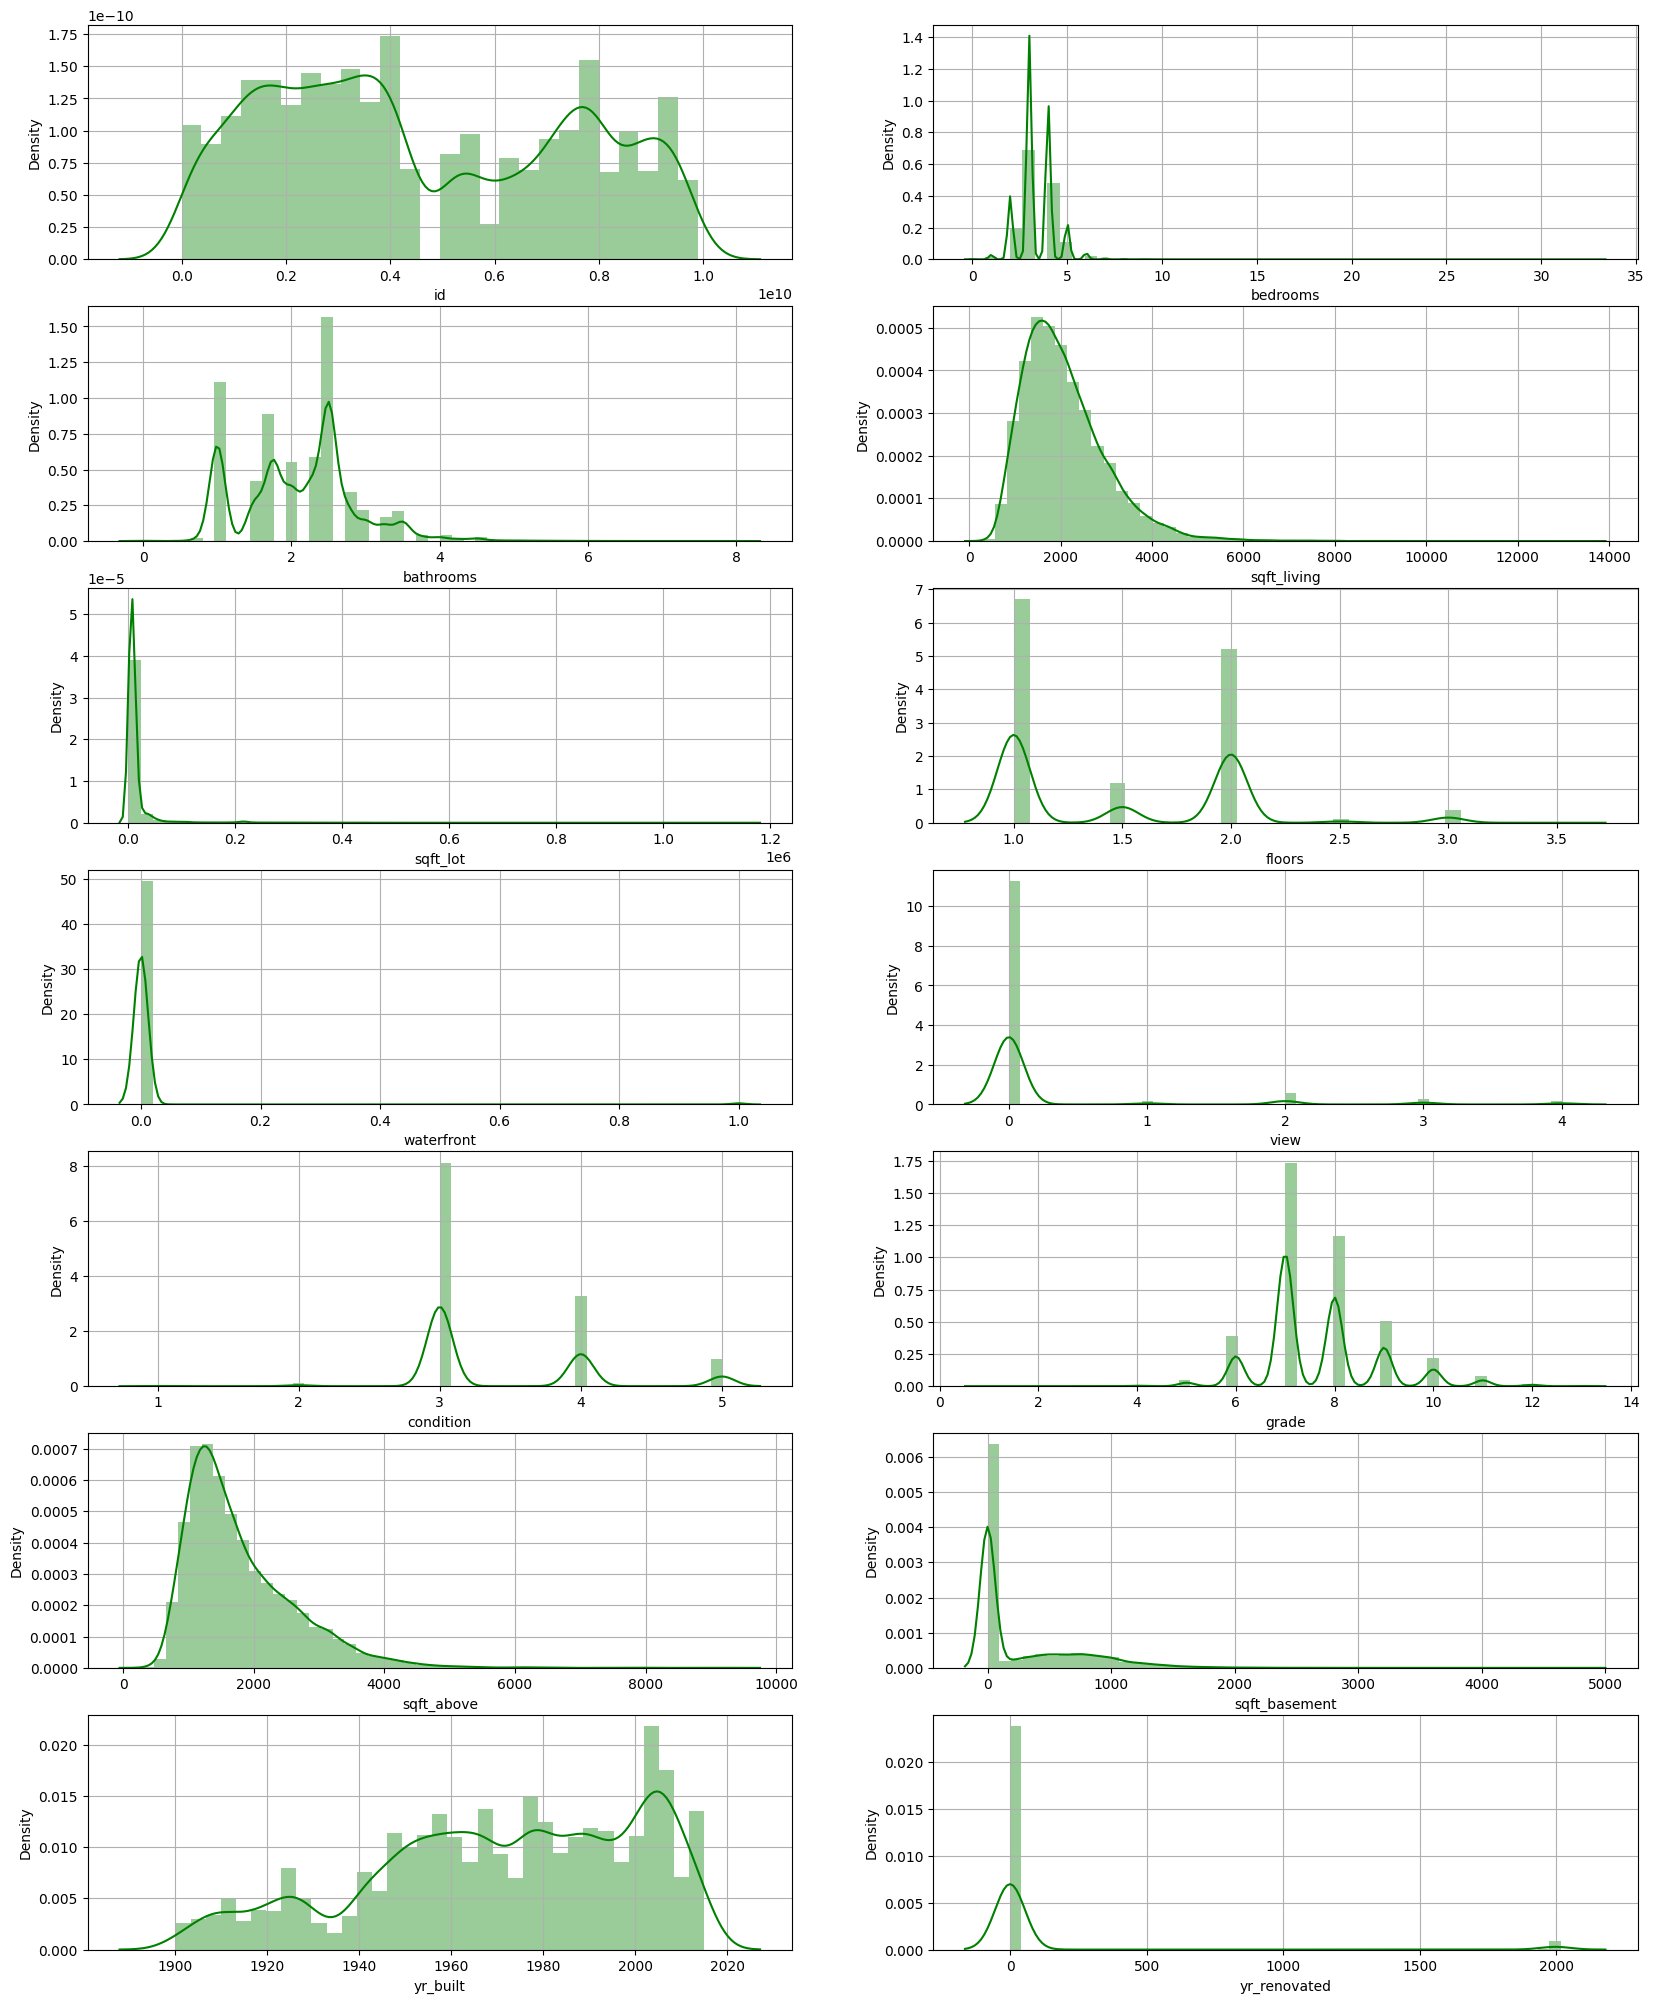

In [3]:
# scale all columns - not sure if this is necessary
scaler = MinMaxScaler()

# add scaled columns to dataframe
for col in X.columns:
    X[col + '_scaled'] = scaler.fit_transform(X[[col]])

fig, ax1 = plt.subplots(7,2, figsize=(20,25))
k = 0
columns = list(housing.columns)
for i in range(7):
    for j in range(2):
            sns.distplot(housing[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

<ipython-input-4-f45ba69cfd58>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing["sqft_living"], color = 'green')


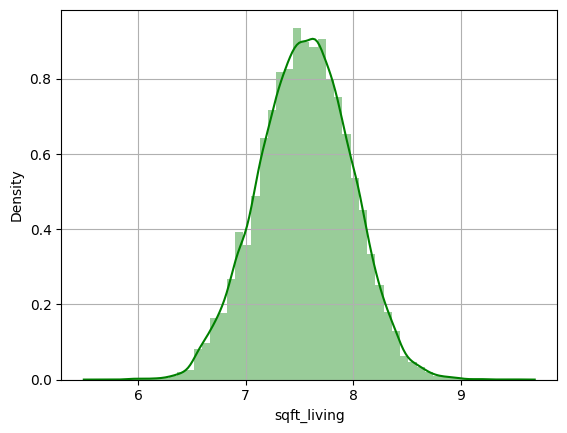

In [4]:
def log_transform(col):
    return np.log(col[0])

housing["sqft_living"]=housing[["sqft_living"]].apply(log_transform, axis=1)
#Plot
sns.distplot(housing["sqft_living"], color = 'green')
plt.grid(True)
plt.show()

<ipython-input-5-dab7bf609b93>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing["sqft_above"], color = 'green')


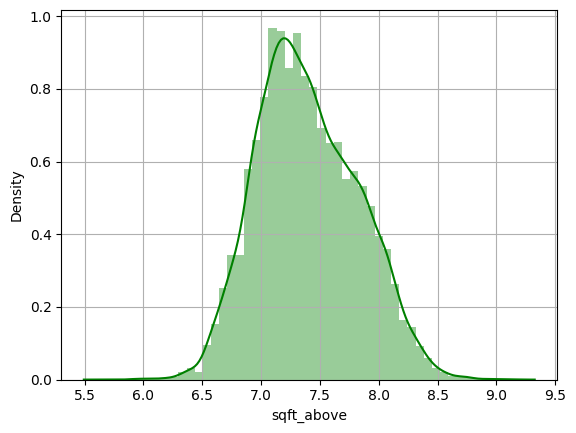

In [5]:
housing["sqft_above"]=housing[["sqft_above"]].apply(log_transform, axis=1)
#Plot
sns.distplot(housing["sqft_above"], color = 'green')
plt.grid(True)
plt.show()